In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load the image and convert it to a numpy array
def load_image(image_path):
    img = Image.open(image_path).convert('L')
    return np.array(img)

# Compute integral image using NumPy cumulative sum
def compute_integral_numpy(image_array):
    return image_array.astype(np.int64).cumsum(axis=0).cumsum(axis=1)

In [3]:
# Compute sum over a rectangular region using the integral image
def get_sum(integral_image, x1, y1, x2, y2):
    A = integral_image[y1-1, x1-1] if x1 > 0 and y1 > 0 else 0
    B = integral_image[y1-1, x2] if y1 > 0 else 0
    C = integral_image[y2, x1-1] if x1 > 0 else 0
    D = integral_image[y2, x2]
    return D - B - C + A

# Apply a filter using the integral image
def apply_filter(integral_image, filter_def, filter_size=4):
    H, W = integral_image.shape
    output = np.zeros((H - filter_size, W - filter_size))

    for y in range(H - filter_size):
        for x in range(W - filter_size):
            total_sum = 0
            for dy in range(filter_size):
                for dx in range(filter_size):
                    weight = filter_def[dy, dx]
                    region_sum = get_sum(integral_image, x + dx, y + dy, x + dx + 1, y + dy + 1)
                    total_sum += weight * region_sum
            output[y, x] = total_sum
    return output

In [4]:
# Normalize array to grayscale (0-255)
def normalize_to_grayscale(array):
    if array.size == 0:
        return array
    array_min, array_max = array.min(), array.max()
    if array_max == array_min:
        return np.full_like(array, 128, dtype=np.uint8)  # Handle uniform images
    normalized = (array - array_min) * (255.0 / (array_max - array_min))
    return normalized.astype(np.uint8)

# Display grayscale image
def display_grayscale_image(image, path, title="Filtered Image"):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.savefig(path)
    plt.show()

Original Image Shape: (168, 299)
Top-left 5x5 pixels:
 [[ 56   8  66  51  91]
 [ 36  33 167 221 224]
 [ 22  50 152 176 161]
 [ 25  14  59 143 196]
 [ 58  62  42  52  44]] 

Top-left 5x5 pixels of Integral Image:
 [[  56   64  130  181  272]
 [  92  133  366  638  953]
 [ 114  205  590 1038 1514]
 [ 139  244  688 1279 1951]
 [ 197  364  850 1493 2209]] 



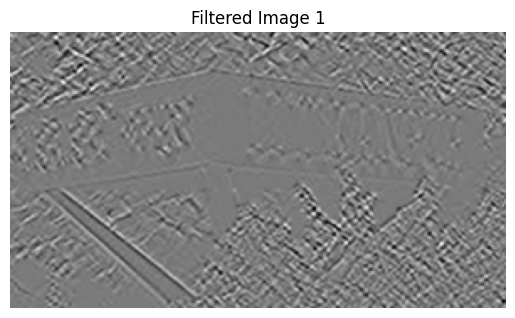

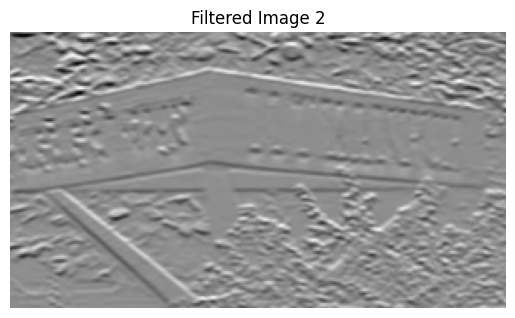

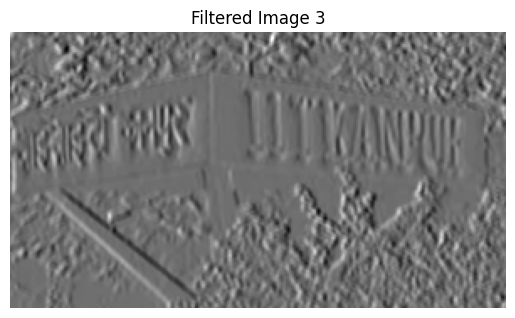

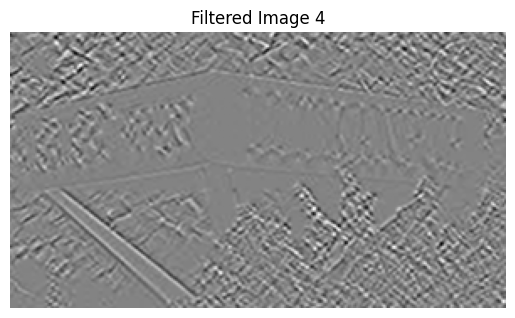

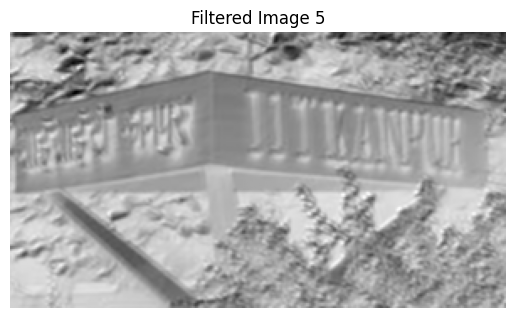

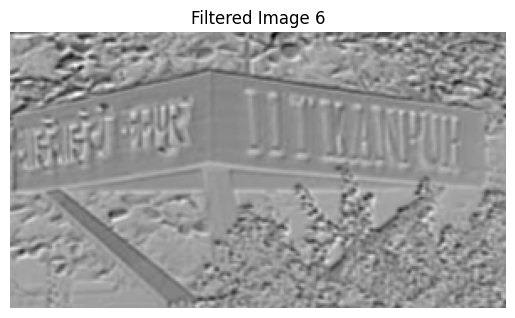

In [5]:
if __name__ == "__main__":
    image_path = "iitk.png"

    # Load and process image
    pixel_array = load_image(image_path)
    integral_image = compute_integral_numpy(pixel_array)

    print("Original Image Shape:", pixel_array.shape)
    print("Top-left 5x5 pixels:\n", pixel_array[:5, :5], "\n")
    print("Top-left 5x5 pixels of Integral Image:\n", integral_image[:5, :5], "\n")

    # Define filters
    filters = [
        np.array([[-1, -1,  1,  1], [-1, -1,  1,  1], [ 1,  1, -1, -1], [ 1,  1, -1, -1]]),
        np.array([[-1, -1, -1, -1], [-1, -1, -1, -1], [ 1,  1,  1,  1], [ 1,  1,  1,  1]]),
        np.array([[-1, -1,  1,  1], [-1, -1,  1,  1], [-1, -1,  1,  1], [-1, -1,  1,  1]]),
        np.array([[ 1,  1, -1, -1], [ 1,  1, -1, -1], [-1, -1,  1,  1], [-1, -1,  1,  1]]),
        np.array([[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1,  1,  1], [-1, -1,  1,  1]]),
        np.array([[ 1,  1,  1,  1], [ 1, -1, -1, -1], [ 1, -1, -1, -1], [ 1, -1, -1, -1]])
    ]

    # Apply filters and display results
    for i, f in enumerate(filters):
        filtered_output = apply_filter(integral_image, f)
        normalized_output = normalize_to_grayscale(filtered_output)
        display_grayscale_image(normalized_output, f"filtered_{i}.png", title=f"Filtered Image {i+1}")